# Lecture 4 –Fall 2023

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

## Dataset: California baby names

In today's lecture, we'll work with the `babynames` dataset, which contains information about the names of infants born in California.

The cell below pulls census data from a government website and then loads it into a usable form. The code shown here is outside of the scope of Data 100, but you're encouraged to dig into it if you are interested!

In [1]:
import urllib.request
import os.path
import zipfile
import pandas as pd

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()


,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Exercises
We want to obtain the first three baby names with `count > 250`.

1.Code this using, loc and head()

2.Code this using, loc and iloc()

3.Code this using [] and head ()


In [8]:
# Answer Here
top=babynames[babynames["Count"]>250]
top.head(3)


,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [15]:
# Answer Here
top.iloc[0:3,:]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [16]:
# Answer Here
top[0:3]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


### `.isin` for Selection based on a list, array, or `Series`

In [17]:
# Note: The parentheses surrounding the code make it possible to break the code into multiple lines for readability

b= ( babynames[(babynames["Name"] == "Bella") |
              (babynames["Name"] == "Alex") |
              (babynames["Name"] == "Narges") |
              (babynames["Name"] == "Lisa")])


In [4]:
# A more concise method to achieve the above: .isin
#Answer Here
ab= ["Bella","Alex","Narges","Lisa"]
print(ab)
b1= babynames[babynames["Name"].isin(ab)]
b1

['Bella', 'Alex', 'Narges', 'Lisa']


,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
393248,CA,M,2018,Alex,495
396111,CA,M,2019,Alex,438
398983,CA,M,2020,Alex,379
401788,CA,M,2021,Alex,333


### `.str` Functions for Defining a Condition

In [5]:
# What if we only want names that start with "J"?
#Answer Here
Name_J=babynames[babynames["Name"].str.contains("J")]
print(Name_J)

       State Sex  Year        Name  Count
16        CA   F  1910   Josephine     66
44        CA   F  1910        Jean     35
46        CA   F  1910      Jessie     32
59        CA   F  1910       Julia     28
66        CA   F  1910     Juanita     25
...      ...  ..   ...         ...    ...
407245    CA   M  2022     Jibreel      5
407246    CA   M  2022   Joseangel      5
407247    CA   M  2022  Josejulian      5
407248    CA   M  2022       Juelz      5
407249    CA   M  2022      Jujhar      5

[34751 rows x 5 columns]


## Adding, Removing, and Modifying Columns

### Add a Column
To add a column, use `[]` to reference the desired new column, then assign it to a `Series` or array of appropriate length.

In [10]:
# Create a Series of the length of each name
length=babynames["Name"].str.len()
#lenght.DataFra
# Add a column named "name_lengths" that includes the length of each name
babynames['name_Lengths']=length
babynames

,State,Sex,Year,Name,Count,name_Lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7
...,...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5,7
407424,CA,M,2022,Zia,5,3
407425,CA,M,2022,Zora,5,4
407426,CA,M,2022,Zuriel,5,6


### Modify a Column
To modify a column, use `[]` to access the desired column, then re-assign it to a new array or Series.

In [14]:
# Modify the "name_lengths" column to be one less than its original value
l=length-1
babynames['New-1']=l
print(babynames)

       State Sex  Year      Name  Count  name_Lengths  New-1
0         CA   F  1910      Mary    295             4      3
1         CA   F  1910     Helen    239             5      4
2         CA   F  1910   Dorothy    220             7      6
3         CA   F  1910  Margaret    163             8      7
4         CA   F  1910   Frances    134             7      6
...      ...  ..   ...       ...    ...           ...    ...
407423    CA   M  2022   Zayvier      5             7      6
407424    CA   M  2022       Zia      5             3      2
407425    CA   M  2022      Zora      5             4      3
407426    CA   M  2022    Zuriel      5             6      5
407427    CA   M  2022      Zylo      5             4      3

[407428 rows x 7 columns]


### Rename a Column Name
Rename a column using the `.rename()` method.

In [20]:
# Rename "name_lengths" to "Length"
a=babynames.rename(columns={"name_Lengths":"Length"})
a

,State,Sex,Year,Name,Count,Length,New-1
0,CA,F,1910,Mary,295,4,3
1,CA,F,1910,Helen,239,5,4
2,CA,F,1910,Dorothy,220,7,6
3,CA,F,1910,Margaret,163,8,7
4,CA,F,1910,Frances,134,7,6
...,...,...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5,7,6
407424,CA,M,2022,Zia,5,3,2
407425,CA,M,2022,Zora,5,4,3
407426,CA,M,2022,Zuriel,5,6,5


### Delete a Column
Remove a column using `.drop()`.

In [22]:
# Remove our new "Length" column
babynames.drop(columns={'name_Lengths'})

,State,Sex,Year,Name,Count,New-1
0,CA,F,1910,Mary,295,3
1,CA,F,1910,Helen,239,4
2,CA,F,1910,Dorothy,220,6
3,CA,F,1910,Margaret,163,7
4,CA,F,1910,Frances,134,6
...,...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5,6
407424,CA,M,2022,Zia,5,2
407425,CA,M,2022,Zora,5,3
407426,CA,M,2022,Zuriel,5,5


## Custom sorting

In [24]:
# Sort a Series Containing Names

a=babynames["Name"].sort_values
a

<bound method Series.sort_values of 0             Mary
1            Helen
2          Dorothy
3         Margaret
4          Frances
            ...   
407423     Zayvier
407424         Zia
407425        Zora
407426      Zuriel
407427        Zylo
Name: Name, Length: 407428, dtype: object>

In [28]:
# Sort a DataFrame – there are lots of Michaels in California
babynames[babynames["Name"] == "Michaels"].sort_values(by='State')


,State,Sex,Year,Name,Count,name_Lengths,New-1


### Approach 1: Create a temporary column

In [5]:
# Create a Series of the length of each name
len=babynames['Name'].str.len()
print('length Series',len)
# Add a column named "name_lengths" that includes the length of each name
babynames['name_lengths']=len
print(babynames)
# Sort by the temporary column
babynames.sort_values(by='name_lengths')

length Series 0         4
1         5
2         7
3         8
4         7
         ..
407423    7
407424    3
407425    4
407426    6
407427    4
Name: Name, Length: 407428, dtype: int64
       State Sex  Year      Name  Count  "name_lengths  name_lengths
0         CA   F  1910      Mary    295              4             4
1         CA   F  1910     Helen    239              5             5
2         CA   F  1910   Dorothy    220              7             7
3         CA   F  1910  Margaret    163              8             8
4         CA   F  1910   Frances    134              7             7
...      ...  ..   ...       ...    ...            ...           ...
407423    CA   M  2022   Zayvier      5              7             7
407424    CA   M  2022       Zia      5              3             3
407425    CA   M  2022      Zora      5              4             4
407426    CA   M  2022    Zuriel      5              6             6
407427    CA   M  2022      Zylo      5              4

,State,Sex,Year,Name,Count,"""name_lengths",name_lengths
326570,CA,M,1993,An,8,2,2
292150,CA,M,1976,Al,13,2,2
252556,CA,M,1937,Al,21,2,2
401470,CA,M,2020,Jr,5,2,2
260022,CA,M,1948,Ed,43,2,2
...,...,...,...,...,...,...,...
339472,CA,M,1998,Franciscojavier,6,15,15
327358,CA,M,1993,Johnchristopher,5,15,15
337477,CA,M,1997,Ryanchristopher,5,15,15
312543,CA,M,1987,Franciscojavier,5,15,15


In [10]:
# Drop the 'name_length' column
babynames.drop(['name_lengths'], axis=1, inplace=True)
babynames


,State,Sex,Year,Name,Count,"""name_lengths"
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7
...,...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5,7
407424,CA,M,2022,Zia,5,3
407425,CA,M,2022,Zora,5,4
407426,CA,M,2022,Zuriel,5,6


### Approach 2: Sorting using the `key` argument

In [33]:
a = babynames["Name"].sort_values(key=lambda x: x.str.len())
a

326570                 An
292150                 Al
252556                 Al
401470                 Jr
260022                 Ed
               ...       
339472    Franciscojavier
327358    Johnchristopher
337477    Ryanchristopher
312543    Franciscojavier
321792    Ryanchristopher
Name: Name, Length: 407428, dtype: object

### Approach 3: Sorting Using the `map` Function

We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [34]:
# First, define a function to count the number of times "sa" or "me" appear in each name


# Then, use `map` to apply `dr_ea_count` to each name in the "Name" column

# Sort the DataFrame by the new "dr_ea_count" column so we can see our handiwork

# Step 1: Define a lambda function to count "sa" or "me"
count_sa_me = lambda name: name.lower().count('sa') + name.lower().count('me')

# Step 2: Use `map` to apply the lambda function to each name in the "Name" column
babynames['sa_me_count'] = babynames['Name'].map(count_sa_me)

# Step 3: Sort the DataFrame by the new 'sa_me_count' column
sorted_babynames = babynames.sort_values(by='sa_me_count', ascending=False)

# Display the sorted DataFrame
print(sorted_babynames)

       State Sex  Year     Name  Count  name_Lengths  New-1  sa_me_count
89011     CA   F  1982   Melisa     57             6      5            2
97940     CA   F  1985  Mellisa     16             7      6            2
335023    CA   M  1996   Salome      5             6      5            2
85128     CA   F  1980  Merissa      7             7      6            2
156644    CA   F  2002  Melissa   1046             7      6            2
...      ...  ..   ...      ...    ...           ...    ...          ...
140991    CA   F  1997    Lilah      7             5      4            0
140990    CA   F  1997   Leslee      7             6      5            0
140988    CA   F  1997      Lee      7             3      2            0
140987    CA   F  1997  Latisha      7             7      6            0
407427    CA   M  2022     Zylo      5             4      3            0

[407428 rows x 8 columns]


In [36]:
# Drop the `dr_ea_count` column
sorted_babynames.drop(columns={'sa_me_count'})

,State,Sex,Year,Name,Count,name_Lengths,New-1
89011,CA,F,1982,Melisa,57,6,5
97940,CA,F,1985,Mellisa,16,7,6
335023,CA,M,1996,Salome,5,6,5
85128,CA,F,1980,Merissa,7,7,6
156644,CA,F,2002,Melissa,1046,7,6
...,...,...,...,...,...,...,...
140991,CA,F,1997,Lilah,7,5,4
140990,CA,F,1997,Leslee,7,6,5
140988,CA,F,1997,Lee,7,3,2
140987,CA,F,1997,Latisha,7,7,6


## Grouping

Group rows that share a common feature, then aggregate data across the group.

In this example, we count the total number of babies born in each year (considering only a small subset of the data, for simplicity).

<img src="images/groupby.png" width="800"/>

In [42]:
# DataFrame with baby gril names only
dtf=babynames[babynames["Sex"]=="F"]
dtf
# Answer Here
#Groupby similar features like year and apply aggregate
at=babynames[["Year"]].groupby("Year").agg(sum)
at
# Answer Here
# Sort by Count
sorted_dtf = dtf.sort_values(by="Count", ascending=False)
print(sorted_dtf)
# Answer Here


C:\Users\pc\AppData\Local\Temp\ipykernel_11800\2041469278.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  at=babynames[["Year"]].groupby("Year").agg(sum)


""
Year
1910
1911
1912
1913
1914
...
2018
2019
2020


In [43]:
# print first 10 entries
at.head(10)

""
Year
1910
1911
1912
1913
1914
1915
1916
1917
1918


In [45]:
#the total baby count in each year

# Answer Here
total_baby_count = babynames.groupby("Year")["Count"].agg(sum).sort_values(ascending=False)
print(total_baby_count)

Year
1990    552647
1991    549317
1992    541054
1993    524983
1989    512615
         ...  
1914     26926
1913     22094
1912     17946
1911      9983
1910      9163
Name: Count, Length: 113, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_11800\4030933299.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_baby_count = babynames.groupby("Year")["Count"].agg(sum).sort_values(ascending=False)


There are many different aggregation functions we can use, all of which are useful in different applications.

In [46]:
# What is the earliest year in which each name appeared?
# Answer Here
earliest_year = babynames.groupby("Name")["Year"].agg('min')
print(earliest_year)

Name
Aadan      2008
Aadarsh    2019
Aaden      2007
Aadhav     2014
Aadhini    2022
           ... 
Zymir      2020
Zyon       1999
Zyra       2012
Zyrah      2011
Zyrus      2021
Name: Year, Length: 20437, dtype: int64


In [47]:
# What is the largest single-year count of each name?
# Answer Here
largest_count = babynames.groupby("Name")["Count"].agg('max')
print(largest_count)

Name
Aadan        7
Aadarsh      6
Aaden      158
Aadhav       8
Aadhini      6
          ... 
Zymir        5
Zyon        17
Zyra        16
Zyrah        6
Zyrus        5
Name: Count, Length: 20437, dtype: int64


In [49]:
#Can you find the most popular baby name in the state of California (CA) for each year? use idxmax function.
#Provide a list of years along with the corresponding most popular names."
result = babynames.groupby("Year")['Count'].idxmax()
#Answer Here

# Filter the DataFrame for the state of California first
ca_babynames = babynames[babynames["State"] == "CA"]

# Then group by 'Year', apply 'idxmax' to find the index of the largest count, and use 'loc' to retrieve the name
most_popular_names = ca_babynames.loc[ca_babynames.groupby("Year")["Count"].idxmax()]

# Now, create a DataFrame with 'Year' and the corresponding most popular 'Name'
result = most_popular_names[['Year', 'Name']].reset_index(drop=True)
print(result)

     Year  Name
0    1910  Mary
1    1911  Mary
2    1912  Mary
3    1913  John
4    1914  Mary
..    ...   ...
108  2018  Emma
109  2019  Noah
110  2020  Noah
111  2021  Noah
112  2022  Liam

[113 rows x 2 columns]


## Case Study: Name "Popularity"

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [14]:
import pandas as pd

f_babynames = babynames[babynames["Sex"] == "F"]

peak_counts = f_babynames.groupby("Name")["Count"].max()


percentage_drop = (peak_counts - f_babynames.groupby("Name")["Count"].last()) / peak_counts * 100

print(percentage_drop)
most_dropped_name = percentage_drop.idxmax()

print("The female baby name that has dropped the most in popularity since its peak usage is:", most_dropped_name)
#print(percentage_drop)

Name
Aadhini     0.000000
Aadhira    50.000000
Aadhya     34.000000
Aadya      41.379310
Aahana     73.076923
             ...    
Zyanya     53.333333
Zyla        0.000000
Zylah       0.000000
Zyra        0.000000
Zyrah      16.666667
Name: Count, Length: 13782, dtype: float64
The female baby name that has dropped the most in popularity since its peak usage is: Debra


In [75]:
import matplotlib.pyplot as plt

# Find the peak usage for each name
peak_usage = babynames[babynames["Sex"] == "F"].groupby('Name')['Count'].max()

# Find the most recent usage for each name
recent_usage = babynames[babynames["Sex"] == "F"].groupby('Name').apply(lambda x: x[x['Year'] == x['Year'].max()]['Count'].iloc[0])

# Calculate the drop in popularity
drop_in_popularity = peak_usage - recent_usage

# Find the name with the largest drop
largest_drop_name = drop_in_popularity.idxmax()
largest_drop_value = drop_in_popularity.max()

# Print the results
print(f"The name with the largest drop in popularity is {largest_drop_name} with a drop of {largest_drop_value}.")

# Plotting the result

plt.figure(figsize=(10, 5))
plt.plot(largest_drop_name, largest_drop_value, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Drop in Count')
plt.title('Name with Largest Drop in Popularity')
plt.show()


The name with the largest drop in popularity is Jessica with a drop of 6854.


C:\Users\pc\AppData\Local\Temp\ipykernel_5788\705821271.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recent_usage = babynames[babynames["Sex"] == "F"].groupby('Name').apply(lambda x: x[x['Year'] == x['Year'].max()]['Count'].iloc[0])


"\nplt.figure(figsize=(10, 5))\nplt.plot(largest_drop_name, largest_drop_value, color='skyblue')\nplt.xlabel('Name')\nplt.ylabel('Drop in Count')\nplt.title('Name with Largest Drop in Popularity')\nplt.show()\n"

C:\Users\pc\AppData\Local\Temp\ipykernel_5788\3857336695.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recent_usage = babynames[babynames["Sex"] == "F"].groupby('Name').apply(lambda x: x[x['Year'] == x['Year'].max()]['Count'].iloc[0])


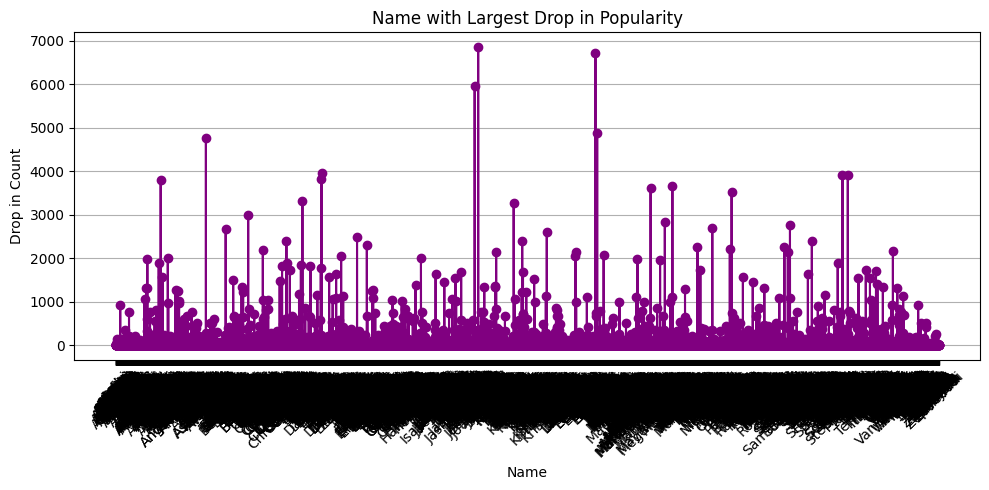

In [76]:
import matplotlib.pyplot as plt

# Assuming 'babynames' is a DataFrame with columns 'Name', 'Sex', 'Year', and 'Count'
peak_usage = babynames[babynames["Sex"] == "F"].groupby('Name')['Count'].max()
recent_usage = babynames[babynames["Sex"] == "F"].groupby('Name').apply(lambda x: x[x['Year'] == x['Year'].max()]['Count'].iloc[0])
drop_in_popularity = peak_usage - recent_usage

largest_drop_name = drop_in_popularity.idxmax()
largest_drop_value = drop_in_popularity.max()

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(drop_in_popularity.index, drop_in_popularity.values, marker='o', color='purple')
plt.xlabel('Name')
plt.ylabel('Drop in Count')
plt.title('Name with Largest Drop in Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [67]:
#Answer Here
case1= babynames[(babynames["Sex"]=="F") & (babynames["Year"]<2000)]
c1 = case1['Count'].max()
case2=babynames[(babynames["Sex"]=="F") & (babynames["Year"]>2000)]
c2=case2['Count'].min()
c3=c1-c2
print(c3)
#c22=c2.sort_values(by='Count', ascending=False)
print(c1)
print(c2)
c4=c3.max()
print(babynames[babynames["Name"] == c4])


IndexError: invalid index to scalar variable.

In [2]:
case1 = babynames[(babynames["Sex"] == "F") & (babynames["Year"] < 2000)]
c1 = case1['Count'].max()
case2 = babynames[(babynames["Sex"] == "F") & (babynames["Year"] > 2000)]
c2 = case2['Count'].min()
c3 = c1 - c2
print(c3)
# If you want to sort case2 by 'Count' and print the first row
c22 = case2.sort_values(by='Count', ascending=False).iloc[0]
print(c1)
print(c2)
# If you want to find the name with the maximum 'Count' in case1
max_name = case1[case1['Count'] == c1]['Name'].iloc[0]
print(max_name)


NameError: name 'babynames' is not defined

In [7]:
import matplotlib.pyplot as plt
# Plotting
names = [most_freq_name_before_2000, most_freq_name_after_2000]
counts = [c1, c2]

plt.bar(names, counts)
plt.xlabel('Names')
plt.ylabel('Counts')
plt.title('Most Frequent Names Before and After 2000')
plt.show()


NameError: name 'most_freq_name_before_2000' is not defined

To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

In [ ]:
# We'll talk about how to generate plots in a later lecture
fig = px.line(f_babynames[f_babynames["Name"] == "Jennifer"],
              x = "Year", y = "Count")
fig.update_layout(font_size = 18,
                  autosize=False,
                 width=1000,
                  height=400)

We'll need a mathematical definition for the change in popularity of a name.

Define the metric "ratio to peak" (RTP). We'll calculate this as the count of the name in 2022 (the most recent year for which we have data) divided by the largest count of this name in *any* year.

A demo calculation for Jennifer:

In [4]:
# Find the highest Jennifer 'count'
# Import necessary libraries
import pandas as pd

# Load the dataset
# Replace 'path_to_dataset' with the actual path to the dataset file
#df = pd.read_csv('path_to_dataset.csv')

# Find the peak count for 'Jennifer'
peak_count = babynames[babynames['Name'] == 'Jennifer']['Count'].max()

# Get the count for 'Jennifer' in 2022
recent_count = babynames[(babynames['Name'] == 'Jennifer') & (babynames['Year'] == 2022)]['Count'].iloc[0]

# Calculate Ratio to Peak (RTP)
rtp_jennifer = recent_count / peak_count

print(f"The Ratio to Peak (RTP) for the name 'Jennifer' is: {rtp_jennifer}")


The Ratio to Peak (RTP) for the name 'Jennifer' is: 0.018796372629843364


In [8]:
# Remember that we sorted f_babynames by year.
# This means that grabbing the final entry gives us the most recent count of Jennifers: 114
# In 2022, the most recent year for which we have data, 114 Jennifers were born
# Assuming 'f_babynames' is a DataFrame with 'Name', 'Year', and 'Count' columns
# and it's sorted by 'Year'

# Find the highest 'Jennifer' count
peak_count = f_babynames[f_babynames['Name'] == 'Jennifer']['Count'].max()

# The most recent count for 'Jennifer' in 2022 is 114
recent_count = 114

# Calculate Ratio to Peak (RTP)
rtp_jennifer = recent_count / peak_count

print(f"The Ratio to Peak (RTP) for the name 'Jennifer' is: {rtp_jennifer:.4f}")


The Ratio to Peak (RTP) for the name 'Jennifer' is: 0.0188


In [9]:
# Compute the RTP
print(f"The Ratio to Peak (RTP) for the name 'Jennifer' is: {rtp_jennifer:.4f}")

The Ratio to Peak (RTP) for the name 'Jennifer' is: 0.0188


We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [10]:
# define the function for RTP
"""
Compute the RTP for a Series containing the counts per year for a single name
"""
def compute_rtp(series, recent_year):
    """
    Compute the RTP for a Series containing the counts per year for a single name.

    Parameters:
    series (pandas.Series): A Series where the index is the year and the value is the count.
    recent_year (int): The most recent year for which we have data.

    Returns:
    float: The RTP value for the given name.
    """
    # Find the peak count in the series
    peak_count = series.max()
    
    # Get the count for the most recent year
    recent_count = series[recent_year]
    
    # Calculate the Ratio to Peak (RTP)
    rtp = recent_count / peak_count
    
    return rtp

# Example usage:
# Assuming 'f_babynames' is a DataFrame with 'Name', 'Year', and 'Count' columns
# and it's sorted by 'Year'. We create a Series for the name 'Jennifer'.

# Create a Series for 'Jennifer'
jennifer_series = f_babynames[f_babynames['Name'] == 'Jennifer'].set_index('Year')['Count']

# Compute RTP for 'Jennifer' for the year 2022
rtp_jennifer = compute_rtp(jennifer_series, 2022)

print(f"The Ratio to Peak (RTP) for the name 'Jennifer' is: {rtp_jennifer:.4f}")


The Ratio to Peak (RTP) for the name 'Jennifer' is: 0.0188


In [11]:
# Construct a Series containing our Jennifer count data

# Then, find the RTP using the function define above
# Assuming 'f_babynames' is your DataFrame with 'Name', 'Year', and 'Count' columns

# Construct a Series for 'Jennifer'
jennifer_series = f_babynames[f_babynames['Name'] == 'Jennifer'].set_index('Year')['Count']

# Define the compute_rtp function (as previously defined)
def compute_rtp(series, recent_year):
    peak_count = series.max()
    recent_count = series[recent_year]
    rtp = recent_count / peak_count
    return rtp

# Calculate the RTP for 'Jennifer' for the year 2022
rtp_jennifer = compute_rtp(jennifer_series, 2022)

# Output the result
print(f"The Ratio to Peak (RTP) for the name 'Jennifer' is: {rtp_jennifer:.4f}")


The Ratio to Peak (RTP) for the name 'Jennifer' is: 0.0188


Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

You may see a warning message when running the cell below. As discussed in lecture, `pandas` can't apply an aggregation function to non-numeric data (it doens't make sense to divide "CA" by a number). By default, `.groupby` will drop any columns that cannot be aggregated.

In [19]:
def calculate_rtp(group):
    peak_count = group['Count'].max()
    # Check if there is any count for the year 2022
    if (group['Year'] == 2022).any():
        recent_count = group[group['Year'] == 2022]['Count'].iloc[0]
    else:
        # If no data for 2022, set recent_count to 0
        recent_count = 0
    rtp = recent_count / peak_count if peak_count > 0 else 0
    return rtp


In [16]:
# Find the RTP fro all names at once using groupby as describe in lec slides
# Assuming 'f_babynames' is your DataFrame with 'Name', 'Year', and 'Count' columns

# Define a function to calculate RTP within each group
def calculate_rtp(group):
    peak_count = group['Count'].max()
    # Get the count for the most recent year (2022)
    # Assuming the DataFrame is sorted by year, so the last entry is the most recent
    recent_count = group.iloc[-1]['Count'] if group.iloc[-1]['Year'] == 2022 else 0
    rtp = recent_count / peak_count if peak_count > 0 else 0
    return rtp

# Group by 'Name' and apply the calculate_rtp function to each group
rtp_all_names = f_babynames.groupby('Name').apply(calculate_rtp)

# The result is a Series with the RTP for each name
print(rtp_all_names)



Name
Aadhini    1.000000
Aadhira    0.500000
Aadhya     0.660000
Aadya      0.586207
Aahana     0.269231
             ...   
Zyanya     0.466667
Zyla       1.000000
Zylah      1.000000
Zyra       1.000000
Zyrah      0.000000
Length: 13782, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_7724\1606637383.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rtp_all_names = f_babynames.groupby('Name').apply(calculate_rtp)


To avoid the warning message above, we explicitly extract only the columns relevant to our analysis before using `.agg`.

In [17]:
# Recompute the RTPs, but only performing the calculation on the "Count" column
# Assuming 'f_babynames' is your DataFrame with 'Name', 'Year', and 'Count' columns

# Define a function to calculate RTP using only the 'Count' column
def calculate_rtp(counts):
    peak_count = counts.max()
    # Assuming the DataFrame is sorted by year, so the last entry is the most recent
    recent_count = counts.iloc[-1] if counts.index[-1] == 2022 else 0
    rtp = recent_count / peak_count if peak_count > 0 else 0
    return rtp

# Group by 'Name' and apply the calculate_rtp function to the 'Count' column of each group
rtp_all_names = f_babynames.groupby('Name')['Count'].apply(calculate_rtp)

# The result is a Series with the RTP for each name
print(rtp_all_names)

Name
Aadhini    0.0
Aadhira    0.0
Aadhya     0.0
Aadya      0.0
Aahana     0.0
          ... 
Zyanya     0.0
Zyla       0.0
Zylah      0.0
Zyra       0.0
Zyrah      0.0
Name: Count, Length: 13782, dtype: float64


In [18]:
# Rename "Count" to "Count RTP" for clarity
# Assuming 'rtp_all_names' is a Series with the RTP for each name

# Convert the Series to a DataFrame
rtp_df = rtp_all_names.reset_index(name='Count RTP')

# Now 'rtp_df' is a DataFrame with the original 'Name' column and the new 'Count RTP' column
print(rtp_df)


          Name  Count RTP
0      Aadhini        0.0
1      Aadhira        0.0
2       Aadhya        0.0
3        Aadya        0.0
4       Aahana        0.0
...        ...        ...
13777   Zyanya        0.0
13778     Zyla        0.0
13779    Zylah        0.0
13780     Zyra        0.0
13781    Zyrah        0.0

[13782 rows x 2 columns]


In [ ]:
# What name has fallen the most in popularity?


We can visualize the decrease in the popularity of the name "?:"

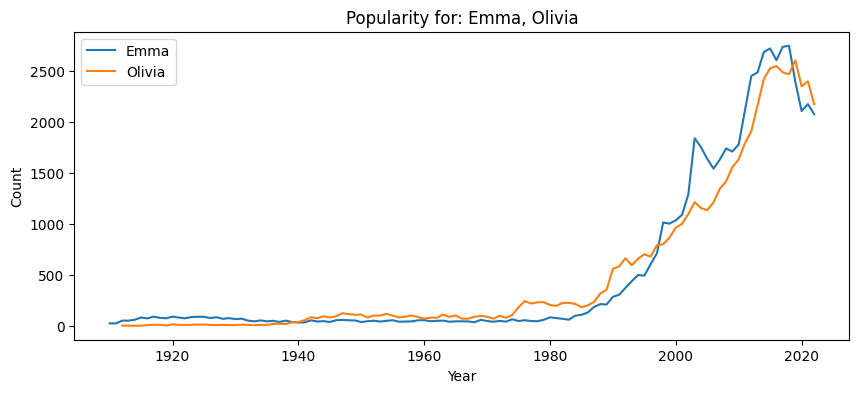

In [16]:
import matplotlib.pyplot as plt

def plot_name(*names):
    # Filter the DataFrame for the selected names
    filtered_data = f_babynames[f_babynames["Name"].isin(names)]
    
    # Plot the data
    fig, ax = plt.subplots()
    for name in names:
        data_to_plot = filtered_data[filtered_data["Name"] == name]
        ax.plot(data_to_plot["Year"], data_to_plot["Count"], label=name)
    
    # Set the title and labels
    ax.set_title(f"Popularity for: {', '.join(names)}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    
    # Set the layout properties
    fig.set_size_inches(10, 4)
    plt.legend()
    plt.show()

# Example usage:
plot_name("Emma", "Olivia")  


In [ ]:
# Find the 10 names that have decreased the most in popularity
# Answer Here

In [18]:
plot_name(*top10)

NameError: name 'top10' is not defined

For fun, try plotting your name or your friends' names.